In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math

In [2]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

,Strategy,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,total_cost_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br,total_cost_br
0,S1,0 1.253872e+06\nName: lifecycle_infrastruct...,"0 0.0\nName: environmental_restoration_el, ...","0 1.516317e+06\nName: safety_el, dtype: flo...","0 2.770189e+06\nName: total_cost_el, dtype:...",0 679601.314361\nName: lifecycle_infrastruc...,"0 0.0\nName: environmental_restoration_br, ...","0 1.515863e+06\nName: safety_br, dtype: flo...","0 2.195465e+06\nName: total_cost_br, dtype:..."
1,S2,0 1.253872e+06\nName: lifecycle_infrastruct...,"0 0.0\nName: environmental_restoration_el, ...","0 1.516317e+06\nName: safety_el, dtype: flo...","0 2.770189e+06\nName: total_cost_el, dtype:...",0 5.564790e+06\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 7.937368e+06\nName: total_cost_br, dtype:..."
2,S3,0 1.253872e+06\nName: lifecycle_infrastruct...,"0 0.0\nName: environmental_restoration_el, ...","0 1.516317e+06\nName: safety_el, dtype: flo...","0 2.770189e+06\nName: total_cost_el, dtype:...",0 1.331226e+07\nName: lifecycle_infrastruct...,0 2.539788e+06\nName: environmental_restora...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 1.736791e+07\nName: total_cost_br, dtype:..."
3,S4,0 1.298439e+07\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 2.294162e+06\nName: safety_el, dtype: flo...","0 1.613526e+07\nName: total_cost_el, dtype:...",0 679601.314361\nName: lifecycle_infrastruc...,"0 0.0\nName: environmental_restoration_br, ...","0 1.515863e+06\nName: safety_br, dtype: flo...","0 2.195465e+06\nName: total_cost_br, dtype:..."
4,S5,0 1.253872e+06\nName: lifecycle_infrastruct...,"0 0.0\nName: environmental_restoration_el, ...","0 1.516317e+06\nName: safety_el, dtype: flo...","0 2.770189e+06\nName: total_cost_el, dtype:...",0 1.331226e+07\nName: lifecycle_infrastruct...,0 2.539788e+06\nName: environmental_restora...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 1.736791e+07\nName: total_cost_br, dtype:..."
5,S6,0 1.325810e+07\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 2.294162e+06\nName: safety_el, dtype: flo...","0 1.640898e+07\nName: total_cost_el, dtype:...",0 1.769104e+06\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 4.141683e+06\nName: total_cost_br, dtype:..."
6,S7,0 1.298439e+07\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 2.294162e+06\nName: safety_el, dtype: flo...","0 1.613526e+07\nName: total_cost_el, dtype:...",0 5.564790e+06\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 7.937368e+06\nName: total_cost_br, dtype:..."
7,S8,0 1.325810e+07\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 2.294162e+06\nName: safety_el, dtype: flo...","0 1.640898e+07\nName: total_cost_el, dtype:...",0 1.769104e+06\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 4.141683e+06\nName: total_cost_br, dtype:..."
8,S9,0 1.298439e+07\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 2.294162e+06\nName: safety_el, dtype: flo...","0 1.613526e+07\nName: total_cost_el, dtype:...",0 5.564790e+06\nName: lifecycle_infrastruct...,0 856715.417853\nName: environmental_restor...,"0 1.515863e+06\nName: safety_br, dtype: flo...","0 7.937368e+06\nName: total_cost_br, dtype:..."
9,S10,0 3.184080e+07\nName: lifecycle_infrastruct...,0 2.539788e+06\nName: environmental_restora...,"0 3.847471e+06\nName: safety_el, dtype: flo...","0 3.822806e+07\nName: total_cost_el, dtype:...",0 4.380793e+06\nName: lifecycle_infrastruct...,0 2.539788e+06\nName: environmental_restora...,"0 1.515863e+06\nName: 

In [3]:
df_cost = df_cost.set_index('Strategy')

In [4]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br', 'total'], axis=1)

In [5]:
df_cost

,lifecycle_infrastructure_el,environmental_restoration_el,safety_el,lifecycle_infrastructure_br,environmental_restoration_br,safety_br
Strategy,,,,,,
I_NN,1570000.0,0.0000,1.661640e+05,8.480912e+05,0.0000,1.661640e+05
I_NC,1570000.0,0.0000,1.661640e+05,5.730000e+06,314891.7243,1.590000e+06
I_NA,1570000.0,0.0000,1.661640e+05,1.350000e+07,933516.8186,4.430000e+06
I_CN,13300000.0,314891.7243,1.590000e+06,8.480912e+05,0.0000,1.661640e+05
I_AN,1570000.0,0.0000,1.661640e+05,1.350000e+07,933516.8186,4.430000e+06
J_CC,13600000.0,314891.7243,1.590000e+06,1.940000e+06,314891.7243,1.590000e+06
I_CC,13300000.0,314891.7243,1.590000e+06,5.730000e+06,314891.7243,1.590000e+06
J_AA,32200000.0,933516.8186,4.430000e+06,4.550000e+06,933516.8186,4.430000e+06
I_AA,31500000.0,933516.8186,4.430000e+06,1.350000e+07,933516.8186,4.430000e+06


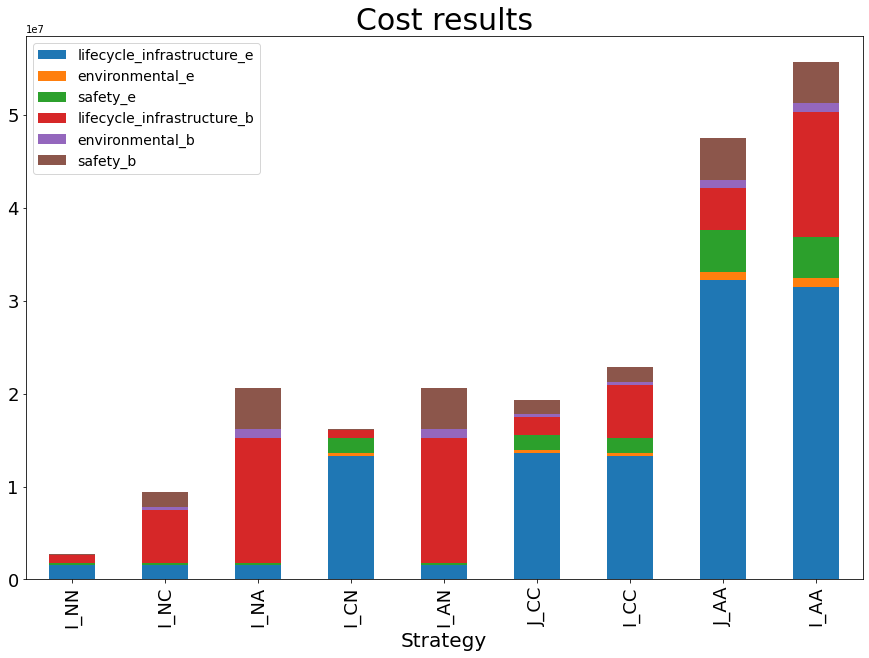

In [6]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

In [7]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

,Strategy,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
0,I_NN,0.000000,1.190000e+09,0.000000,2620000.0
1,I_NC,0.000000,1.190000e+09,1020.823948,1910000.0
2,I_NA,0.000000,1.190000e+09,2220.392903,1250000.0
3,I_CN,1020.823948,8.650000e+08,0.000000,2620000.0
4,I_AN,2220.392903,5.670000e+08,0.000000,2620000.0
5,J_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
6,I_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
7,J_AA,2220.392903,5.670000e+08,2220.392903,1250000.0
8,I_AA,2220.392903,5.670000e+08,2220.392903,1250000.0


In [8]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [9]:
df_loss_benefit

,aesthetic_benefit_el,economic_losses_el,aesthetic_benefit_br,economic_loss_br
Strategy,,,,
I_NN,0.000000,1.190000e+09,0.000000,2620000.0
I_NC,0.000000,1.190000e+09,1020.823948,1910000.0
I_NA,0.000000,1.190000e+09,2220.392903,1250000.0
I_CN,1020.823948,8.650000e+08,0.000000,2620000.0
I_AN,2220.392903,5.670000e+08,0.000000,2620000.0
J_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
I_CC,1020.823948,8.650000e+08,1020.823948,1910000.0
J_AA,2220.392903,5.670000e+08,2220.392903,1250000.0
I_AA,2220.392903,5.670000e+08,2220.392903,1250000.0


In [10]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [11]:
df_loss

,economic_losses_el,economic_loss_br
Strategy,,
I_NN,1.190000e+09,2620000.0
I_NC,1.190000e+09,1910000.0
I_NA,1.190000e+09,1250000.0
I_CN,8.650000e+08,2620000.0
I_AN,5.670000e+08,2620000.0
J_CC,8.650000e+08,1910000.0
I_CC,8.650000e+08,1910000.0
J_AA,5.670000e+08,1250000.0
I_AA,5.670000e+08,1250000.0


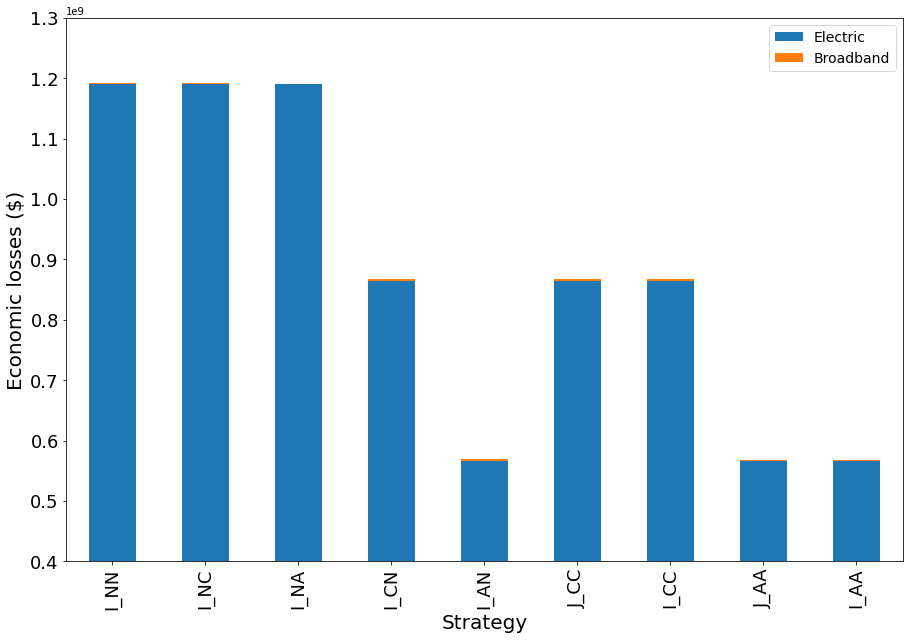

In [12]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.ylabel('Economic losses ($)',fontsize=20)
plt.legend(['Electric','Broadband'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss.png', dpi=300)

In [13]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)

In [14]:
df_benefit

,aesthetic_benefit_el,aesthetic_benefit_br
Strategy,,
I_NN,0.000000,0.000000
I_NC,0.000000,1020.823948
I_NA,0.000000,2220.392903
I_CN,1020.823948,0.000000
I_AN,2220.392903,0.000000
J_CC,1020.823948,1020.823948
I_CC,1020.823948,1020.823948
J_AA,2220.392903,2220.392903
I_AA,2220.392903,2220.392903


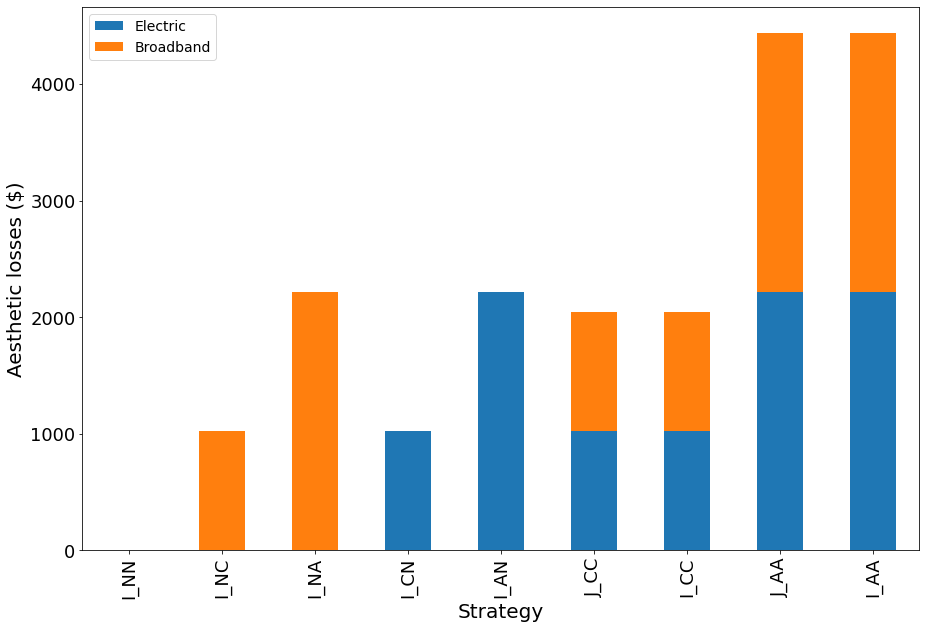

In [16]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.ylabel('Aesthetic losses ($)',fontsize=20)
plt.legend(['Electric','Broadband'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-benefit.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [340]:
with open(r'../../results/outcomes/npv_cost_loss_benefit.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,1930000.0,0.000000e+00,3030000.0,4960000.0,0.0,1.190000e+09,-1.200000e+09
1,INC,6810000.0,8.567154e+05,3810000.0,11500000.0,1020.0,1.190000e+09,-1.200000e+09
2,INA,14600000.0,2.540000e+06,5360000.0,22500000.0,2220.0,1.190000e+09,-1.210000e+09
3,ICN,13700000.0,8.567154e+05,3810000.0,18400000.0,1020.0,8.680000e+08,-8.860000e+08
4,IAN,14600000.0,2.540000e+06,5360000.0,22500000.0,2220.0,5.700000e+08,-5.920000e+08
5,ICC,15100000.0,1.713431e+06,4590000.0,21400000.0,2040.0,8.670000e+08,-8.880000e+08
6,IAA,18600000.0,1.713431e+06,4590000.0,24900000.0,2040.0,8.670000e+08,-8.920000e+08
7,JCC,36200000.0,5.080000e+06,7690000.0,49000000.0,4440.0,5.680000e+08,-6.170000e+08
8,JAA,44500000.0,5.080000e+06,7690000.0,57300000.0,4440.0,5.680000e+08,-6.260000e+08


In [341]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [342]:
df_npv_cost_loss_benefit

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,1930000.0,0.000000e+00,3030000.0,4960000.0,0.0,1.190000e+09,-1.200000e+09
1,INC,6810000.0,8.567154e+05,3810000.0,11500000.0,1020.0,1.190000e+09,-1.200000e+09
2,INA,14600000.0,2.540000e+06,5360000.0,22500000.0,2220.0,1.190000e+09,-1.210000e+09
3,ICN,13700000.0,8.567154e+05,3810000.0,18400000.0,1020.0,8.680000e+08,-8.860000e+08
4,IAN,14600000.0,2.540000e+06,5360000.0,22500000.0,2220.0,5.700000e+08,-5.920000e+08
5,ICC,15100000.0,1.713431e+06,4590000.0,21400000.0,2040.0,8.670000e+08,-8.880000e+08
6,IAA,18600000.0,1.713431e+06,4590000.0,24900000.0,2040.0,8.670000e+08,-8.920000e+08
7,JCC,36200000.0,5.080000e+06,7690000.0,49000000.0,4440.0,5.680000e+08,-6.170000e+08
8,JAA,44500000.0,5.080000e+06,7690000.0,57300000.0,4440.0,5.680000e+08,-6.260000e+08


In [343]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [344]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [345]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [346]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,ICC,IAA,JCC,JAA
net_benefit,-1.200000e+09,-1.200000e+09,-1.210000e+09,-886000000.0,-592000000.0,-888000000.0,-892000000.0,-617000000.0,-626000000.0


In [347]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [348]:
df_npv_net_benefit_new

Strategy,INN,INC,INA,ICN,IAN,ICC,IAA,JCC,JAA
net_benefit,-1.200000e+09,-1.200000e+09,-1.210000e+09,-886000000.0,-592000000.0,-888000000.0,-892000000.0,-617000000.0,-626000000.0


In [349]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [430]:
df_npv_net_benefit

,Strategy,net_benefit
0,INN,-1.200000e+09
1,INC,-1.200000e+09
2,INA,-1.210000e+09
3,ICN,-8.860000e+08
4,IAN,-5.920000e+08
5,ICC,-8.880000e+08
6,IAA,-8.920000e+08
7,JCC,-6.170000e+08
8,JAA,-6.260000e+08


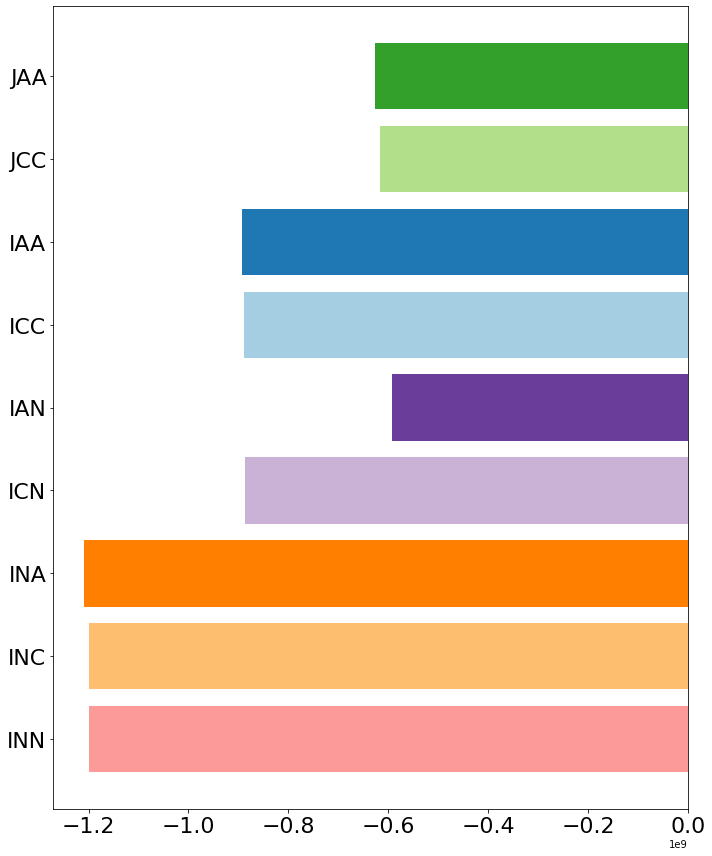

In [509]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig.set_size_inches(5,4)
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit.loc[i,"net_benefit"],color=row)
#plt.xlabel ('Net benefit (2022 $)')
#plt.ylabel ('Strategies')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.yticks(df_npv_net_benefit.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
plt.show()

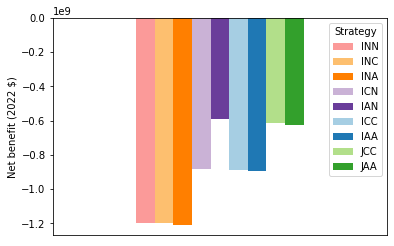

In [288]:
# plotting graph (new version)
ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'])
ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
plt.show()

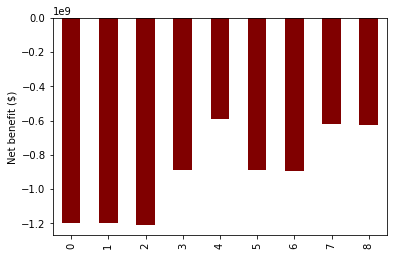

In [272]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

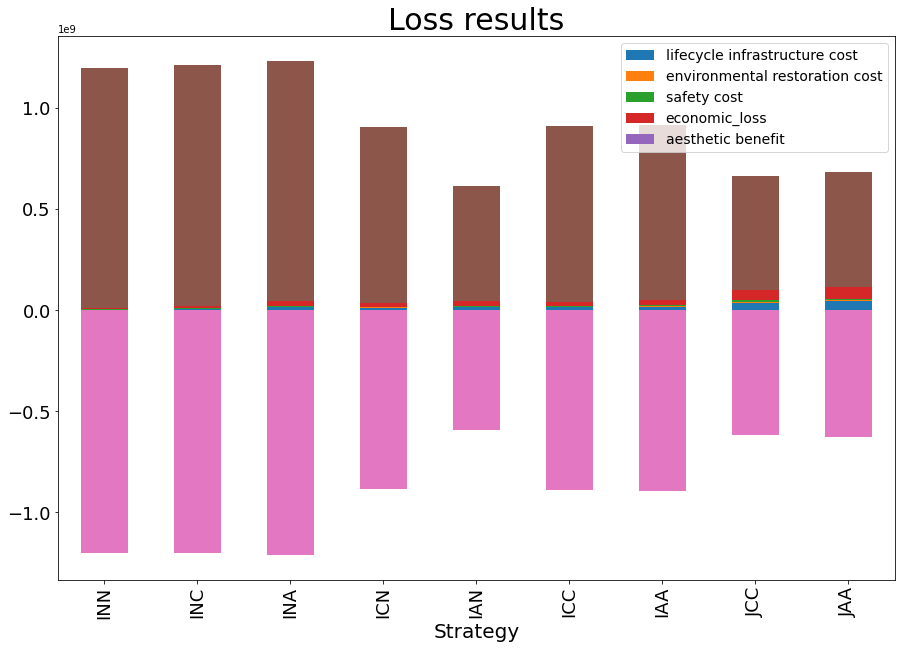

In [89]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [90]:
df_npv_cost_loss_benefit

,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
Strategy,,,,,,,
INN,1930000.0,0.000000e+00,3030000.0,4960000.0,0.0,1.190000e+09,-1.200000e+09
INC,6810000.0,8.567154e+05,3810000.0,11500000.0,1020.0,1.190000e+09,-1.200000e+09
INA,14600000.0,2.540000e+06,5360000.0,22500000.0,2220.0,1.190000e+09,-1.210000e+09
ICN,13700000.0,8.567154e+05,3810000.0,18400000.0,1020.0,8.680000e+08,-8.860000e+08
IAN,14600000.0,2.540000e+06,5360000.0,22500000.0,2220.0,5.700000e+08,-5.920000e+08
ICC,15100000.0,1.713431e+06,4590000.0,21400000.0,2040.0,8.670000e+08,-8.880000e+08
IAA,18600000.0,1.713431e+06,4590000.0,24900000.0,2040.0,8.670000e+08,-8.920000e+08
JCC,36200000.0,5.080000e+06,7690000.0,49000000.0,4440.0,5.680000e+08,-6.170000e+08
JAA,44500000.0,5.080000e+06,7690000.0,57300000.0,4440.0,5.680000e+08,-6.260000e+08


In [91]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','economic_losses', 'aesthetic_benefit'], axis=1)

In [458]:
df_npv_cost

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,1930000.0,0.000000e+00,3030000.0
INC,6810000.0,8.567154e+05,3810000.0
INA,14600000.0,2.540000e+06,5360000.0
ICN,13700000.0,8.567154e+05,3810000.0
IAN,14600000.0,2.540000e+06,5360000.0
ICC,15100000.0,1.713431e+06,4590000.0
IAA,18600000.0,1.713431e+06,4590000.0
JCC,36200000.0,5.080000e+06,7690000.0
JAA,44500000.0,5.080000e+06,7690000.0


In [461]:
df_npv_cost=df_npv_cost.reset_index()

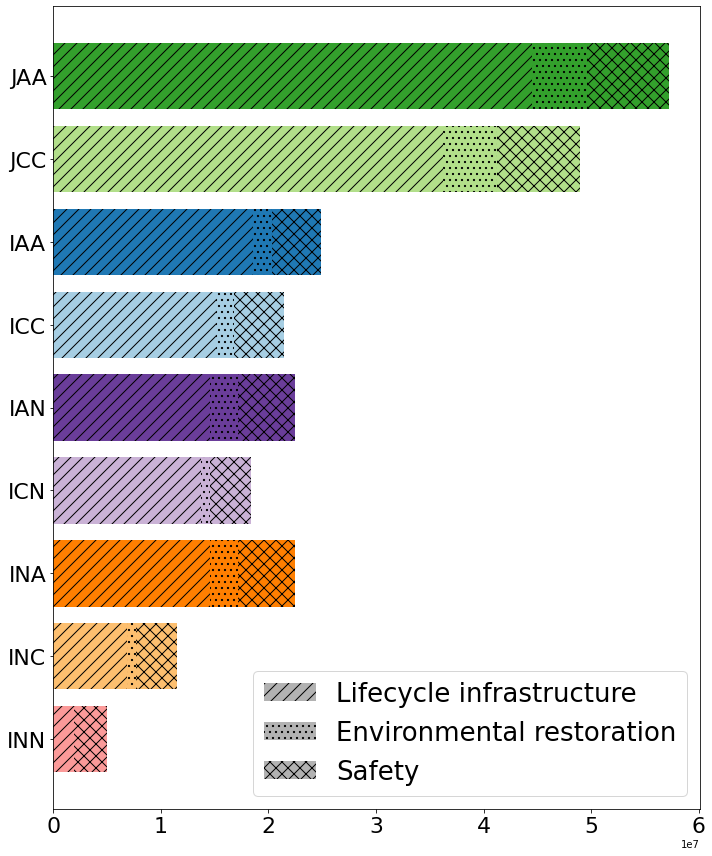

In [533]:
fig,(ax) = plt.subplots()
fig.set_size_inches(10, 12)

#plt.rcParams["figure.figsize"] = [10, 12]
#plt.rcParams["figure.autolayout"] = True

x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']


b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'],hatch='//')

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='..')

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='xx')

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=26)
plt.tight_layout()

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

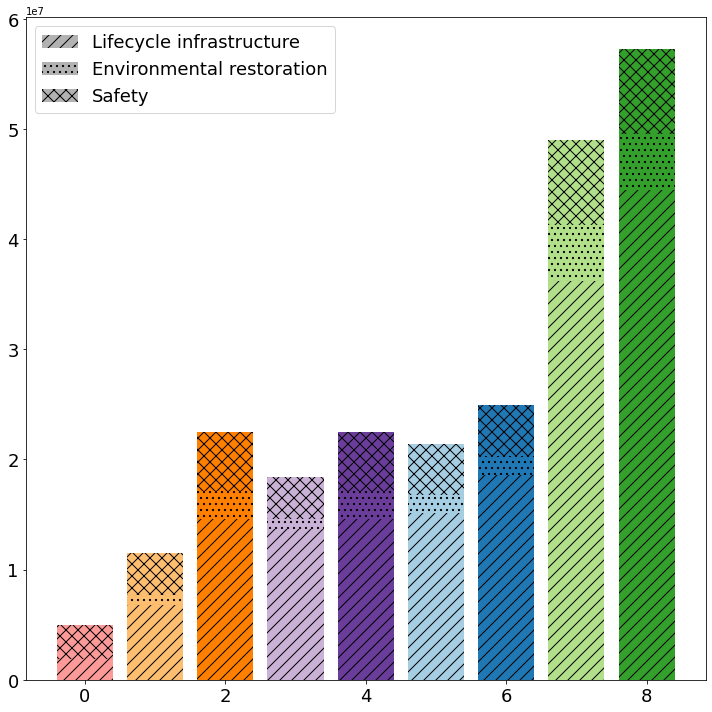

In [526]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

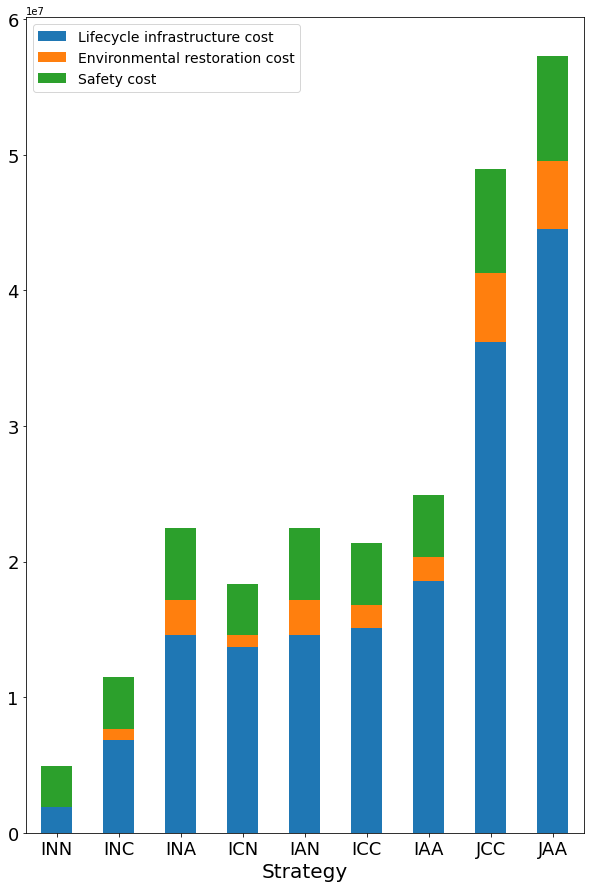

In [93]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [94]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [435]:
df_npv_loss

,economic_losses
Strategy,
INN,1.190000e+09
INC,1.190000e+09
INA,1.190000e+09
ICN,8.680000e+08
IAN,5.700000e+08
ICC,8.670000e+08
IAA,8.670000e+08
JCC,5.680000e+08
JAA,5.680000e+08


In [436]:
df_npv_loss=df_npv_loss.reset_index()

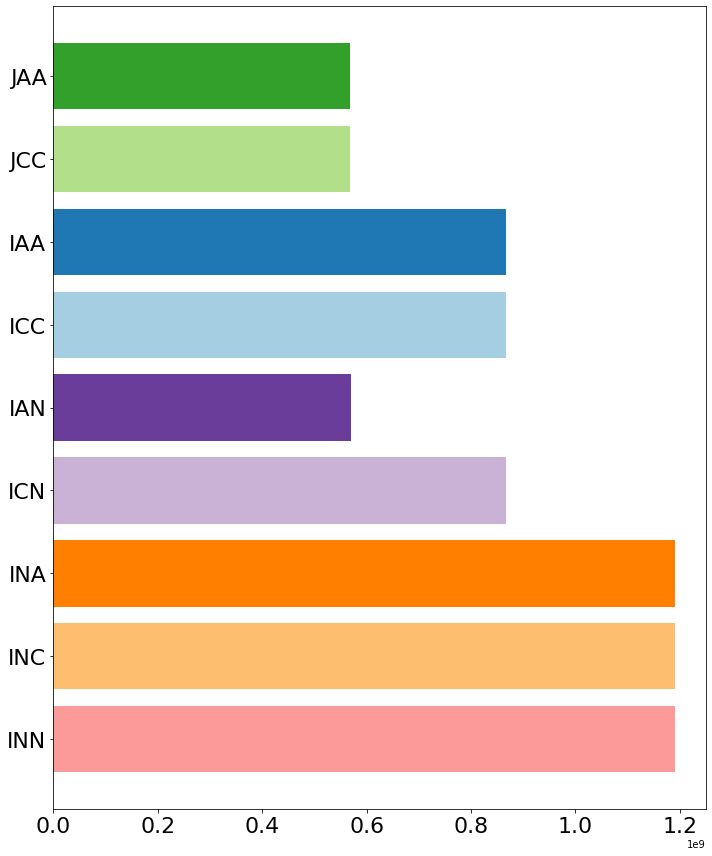

In [521]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig.set_size_inches(10,15)

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"economic_losses"],color=row)
#plt.xlabel ('Economic loss (2022 $)')
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)
plt.show()

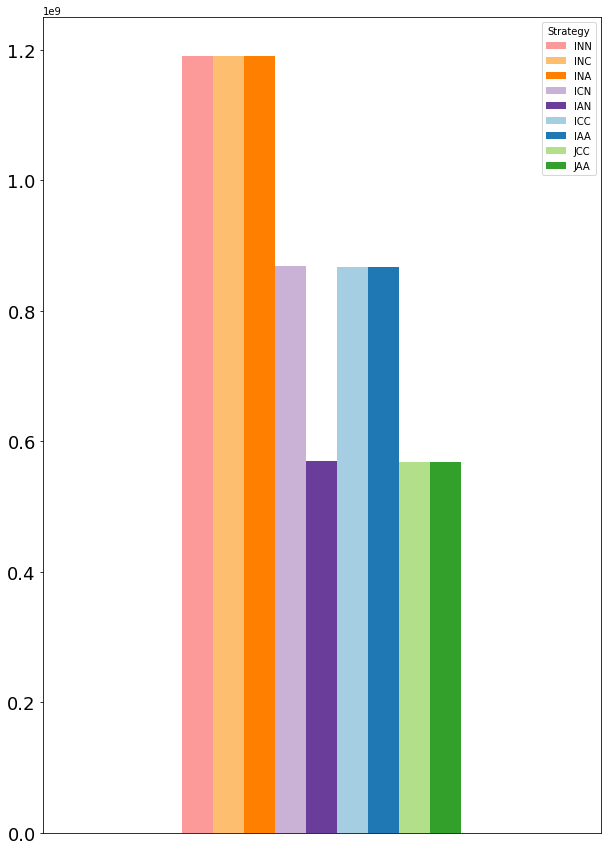

In [175]:
# plotting loss results integerated for broadband and electric
ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

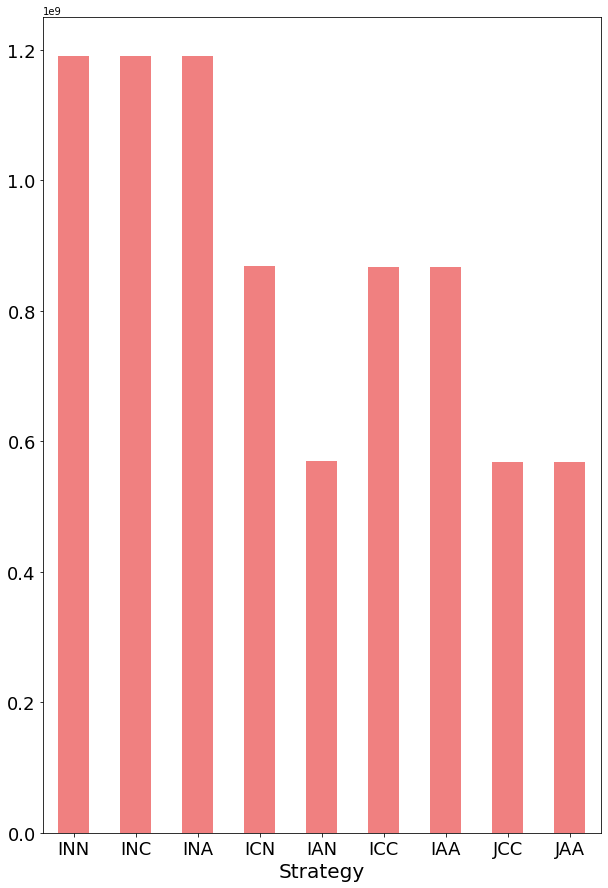

In [114]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [445]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [446]:
df_npv_benefit

,aesthetic_benefit
Strategy,
INN,0.0
INC,1020.0
INA,2220.0
ICN,1020.0
IAN,2220.0
ICC,2040.0
IAA,2040.0
JCC,4440.0
JAA,4440.0


In [447]:
df_npv_benefit=df_npv_benefit.reset_index()

In [448]:
df_npv_benefit

,Strategy,aesthetic_benefit
0,INN,0.0
1,INC,1020.0
2,INA,2220.0
3,ICN,1020.0
4,IAN,2220.0
5,ICC,2040.0
6,IAA,2040.0
7,JCC,4440.0
8,JAA,4440.0


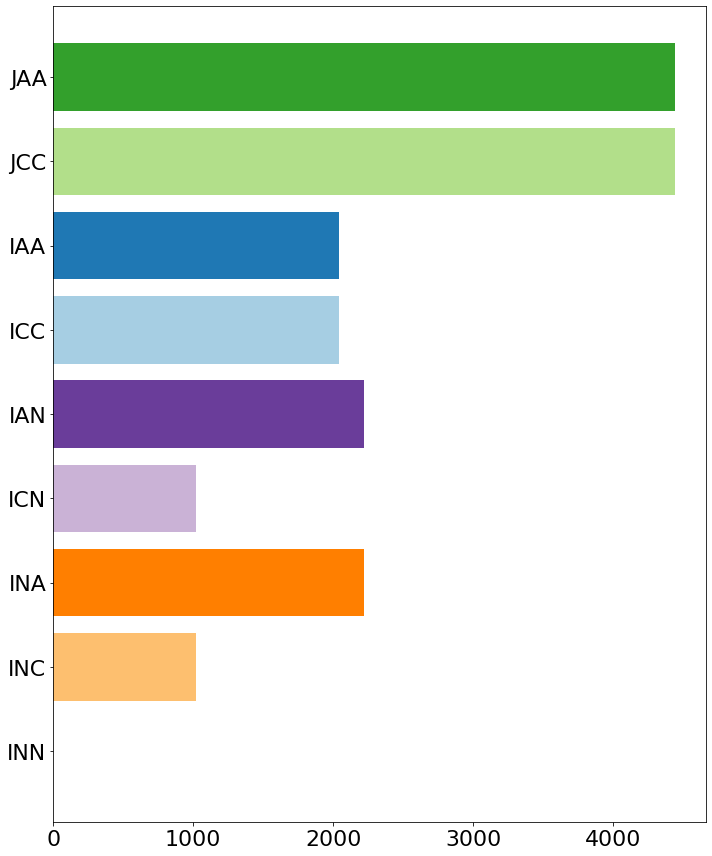

In [522]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig.set_size_inches(10,15)

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row)
#plt.xlabel ('Aesthetic benefit (2022 $)')
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)
plt.show()

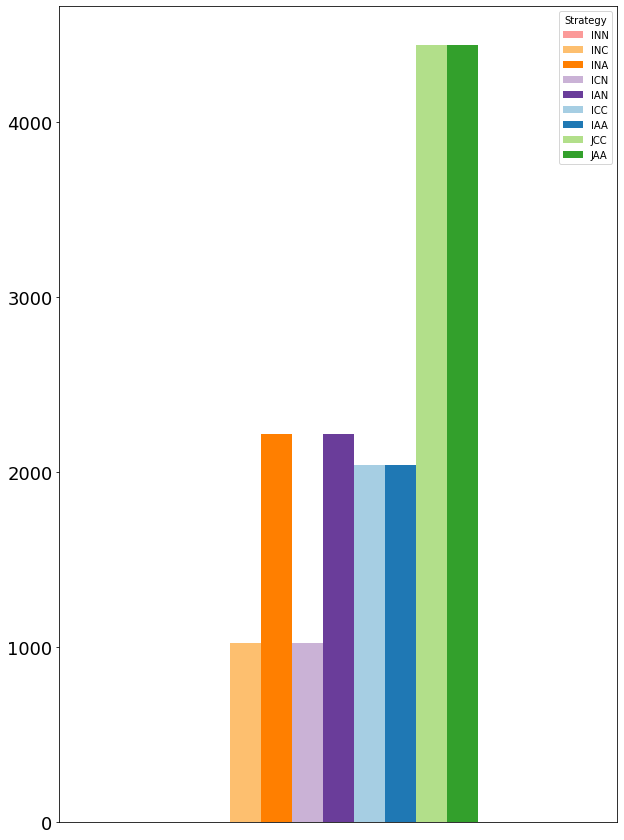

In [186]:
# plotting benefit results integerated for broadband and electric
ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

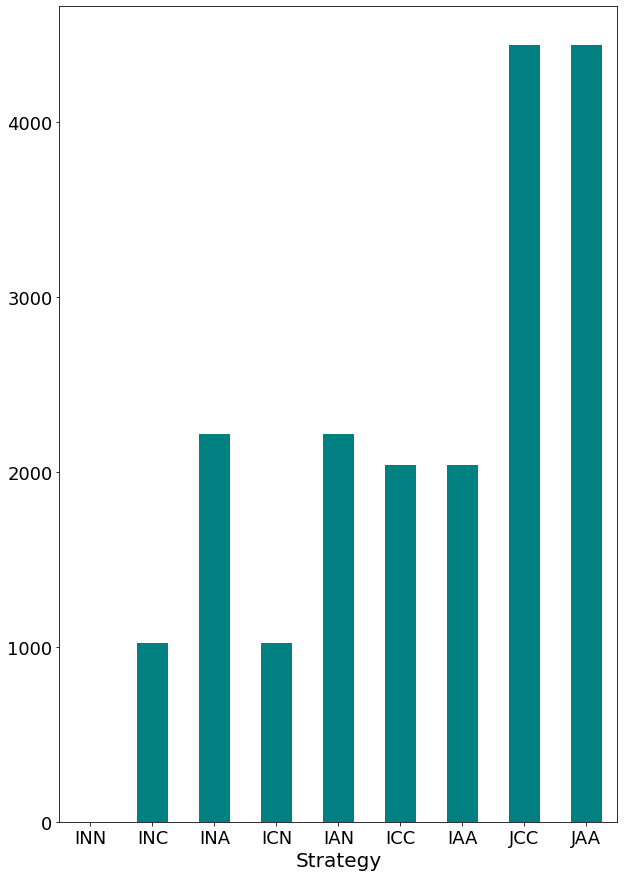

In [98]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [423]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

,Strategy,lifecycle_infrastructure,environmental_restoration,safety,total_cost,aesthetic_benefit,economic_losses,net_benefit
0,INN,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0
1,INC,4880000.0,8.567154e+05,780000.0,6520000.0,1020.0,-710000.0,-5810000.0
2,INA,12700000.0,2.540000e+06,2330000.0,17500000.0,2220.0,-1370000.0,-16100000.0
3,ICN,11800000.0,8.567154e+05,780000.0,13400000.0,1020.0,-325000000.0,312000000.0
4,IAN,12700000.0,2.540000e+06,2330000.0,17500000.0,2220.0,-623000000.0,606000000.0
5,ICC,13200000.0,1.713431e+06,1560000.0,16400000.0,2040.0,-326000000.0,309000000.0
6,IAA,16700000.0,1.713431e+06,1560000.0,19900000.0,2040.0,-326000000.0,306000000.0
7,JCC,34300000.0,5.080000e+06,4660000.0,44000000.0,4440.0,-624000000.0,580000000.0
8,JAA,42600000.0,5.080000e+06,4660000.0,52300000.0,4440.0,-624000000.0,572000000.0


In [424]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [425]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','economic_losses'], axis=1)

In [431]:
df_npv_net_benefit_relative

,net_benefit
Strategy,
INN,0.0
INC,-5810000.0
INA,-16100000.0
ICN,312000000.0
IAN,606000000.0
ICC,309000000.0
IAA,306000000.0
JCC,580000000.0
JAA,572000000.0


In [432]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

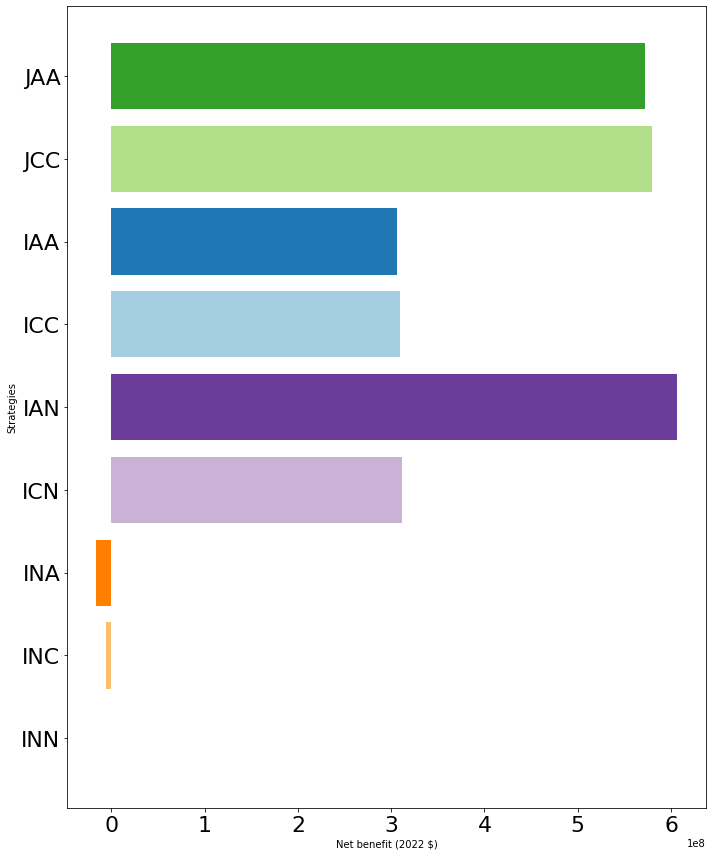

In [512]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig.set_size_inches(5,4)

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row)
plt.xlabel ('Net benefit (2022 $)')
plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
plt.show()

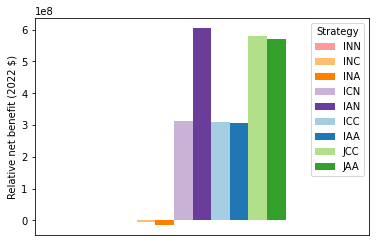

In [188]:
# plotting graph (Ver 02)
ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'])
ax.set_xticks([])
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
plt.show()

<AxesSubplot:xlabel='Strategy', ylabel='Relative net benefit ($)'>

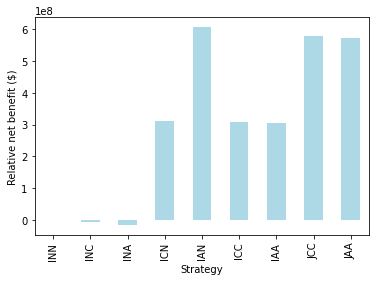

In [120]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [105]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [106]:
df_npv_cost_loss_benefit_relative

,lifecycle_infrastructure,environmental_restoration,safety,aesthetic_benefit,economic_losses
Strategy,,,,,
INN,0.0,0.000000e+00,0.0,0.0,0.0
INC,4880000.0,8.567154e+05,780000.0,1020.0,-710000.0
INA,12700000.0,2.540000e+06,2330000.0,2220.0,-1370000.0
ICN,11800000.0,8.567154e+05,780000.0,1020.0,-325000000.0
IAN,12700000.0,2.540000e+06,2330000.0,2220.0,-623000000.0
ICC,13200000.0,1.713431e+06,1560000.0,2040.0,-326000000.0
IAA,16700000.0,1.713431e+06,1560000.0,2040.0,-326000000.0
JCC,34300000.0,5.080000e+06,4660000.0,4440.0,-624000000.0
JAA,42600000.0,5.080000e+06,4660000.0,4440.0,-624000000.0


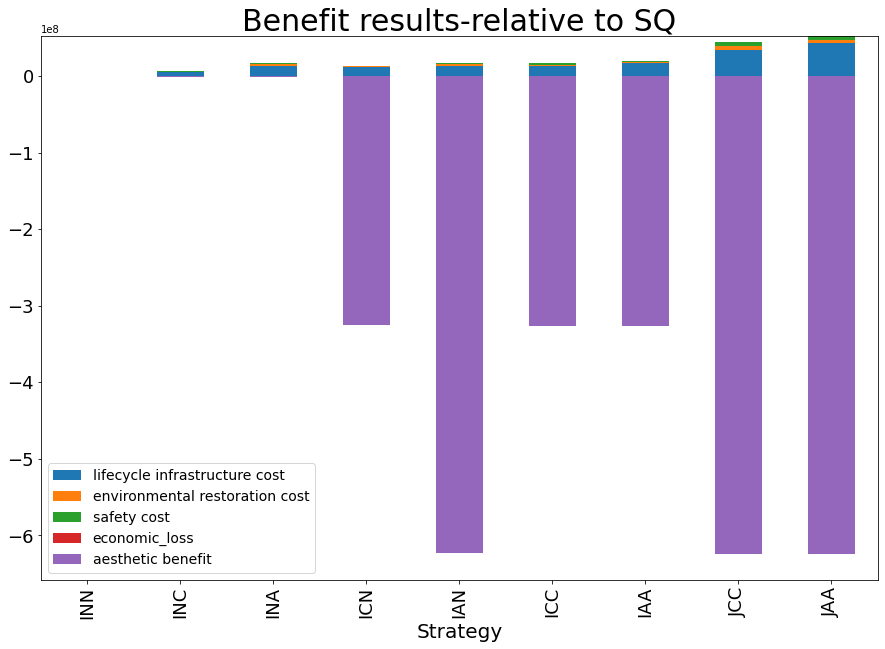

In [107]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [138]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['economic_losses', 'aesthetic_benefit'], axis=1)

In [473]:
df_npv_cost_relative

,lifecycle_infrastructure,environmental_restoration,safety
Strategy,,,
INN,0.0,0.000000e+00,0.0
INC,4880000.0,8.567154e+05,780000.0
INA,12700000.0,2.540000e+06,2330000.0
ICN,11800000.0,8.567154e+05,780000.0
IAN,12700000.0,2.540000e+06,2330000.0
ICC,13200000.0,1.713431e+06,1560000.0
IAA,16700000.0,1.713431e+06,1560000.0
JCC,34300000.0,5.080000e+06,4660000.0
JAA,42600000.0,5.080000e+06,4660000.0


In [474]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

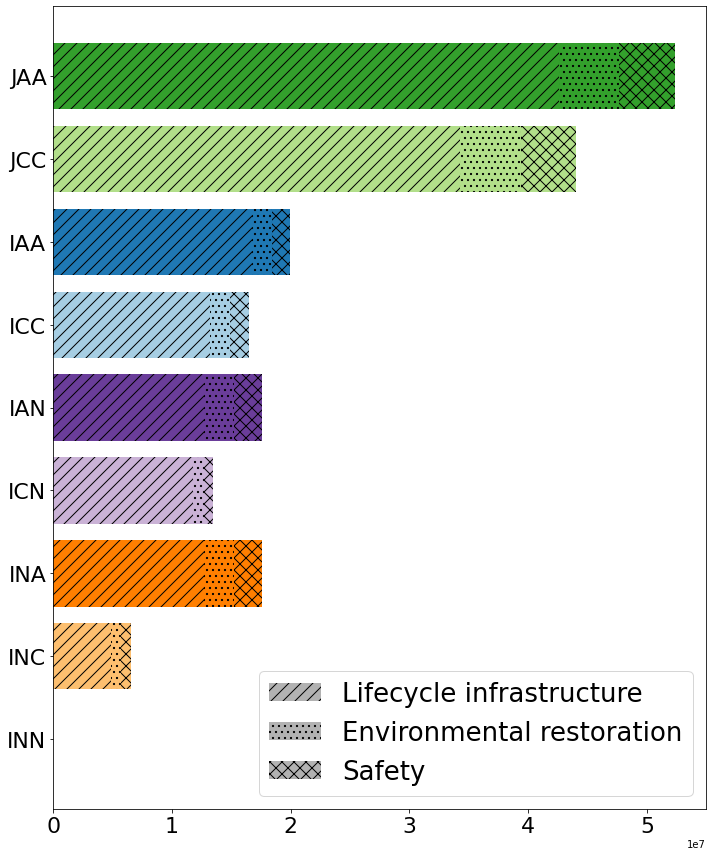

In [534]:
fig,(ax) = plt.subplots()
fig.set_size_inches(10, 12)

#plt.rcParams["figure.figsize"] = [10, 12]
#plt.rcParams["figure.autolayout"] = True

x= df_npv_cost_relative.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']


b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'],hatch='//')

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='..')

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='xx')

plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=26)
plt.tight_layout()

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

plt.show()

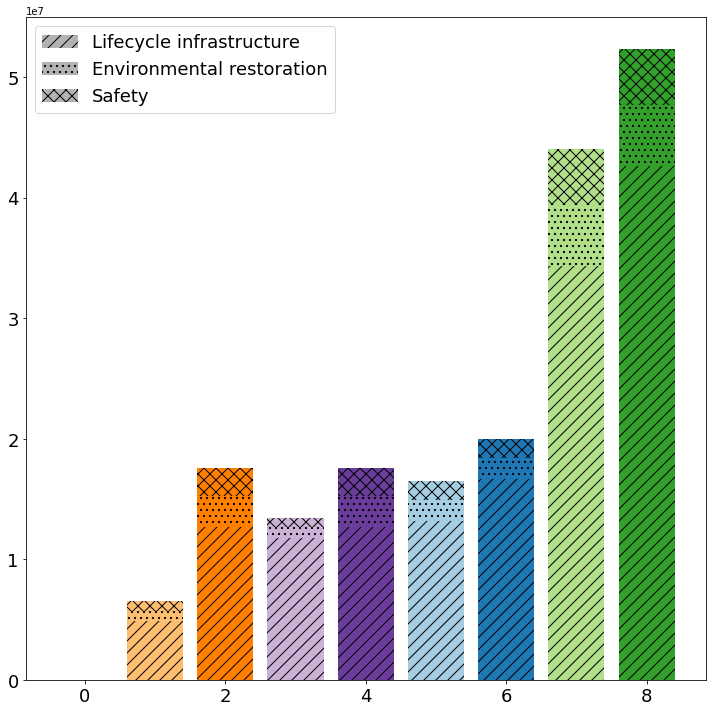

In [525]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

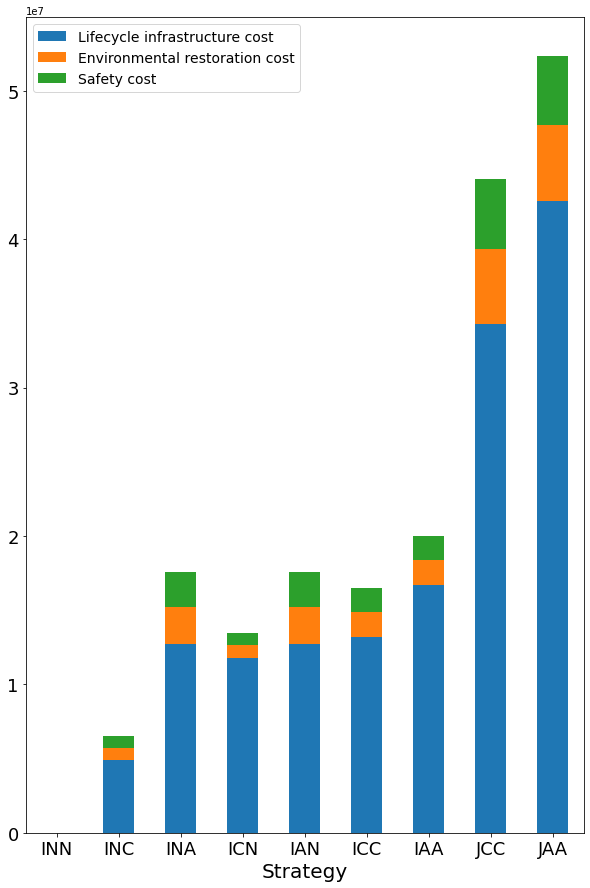

In [109]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)0)

In [110]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [455]:
df_npv_loss_relative

,economic_losses
Strategy,
INN,0.0
INC,-710000.0
INA,-1370000.0
ICN,-325000000.0
IAN,-623000000.0
ICC,-326000000.0
IAA,-326000000.0
JCC,-624000000.0
JAA,-624000000.0


In [456]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

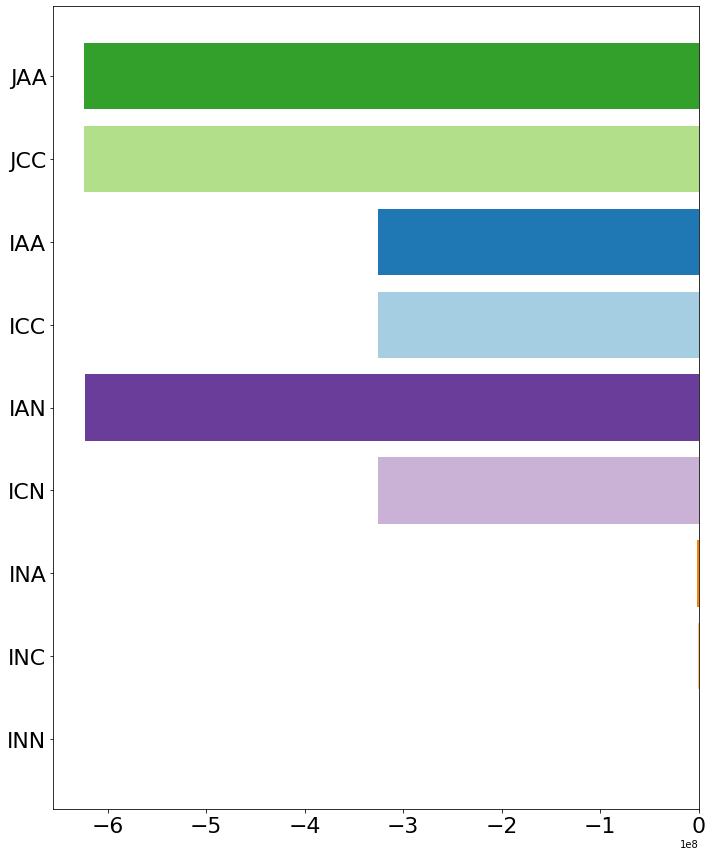

In [519]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig.set_size_inches(10,15)

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"economic_losses"],color=row)
#plt.xlabel ('Economic loss (2022 $)')
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)
plt.show()

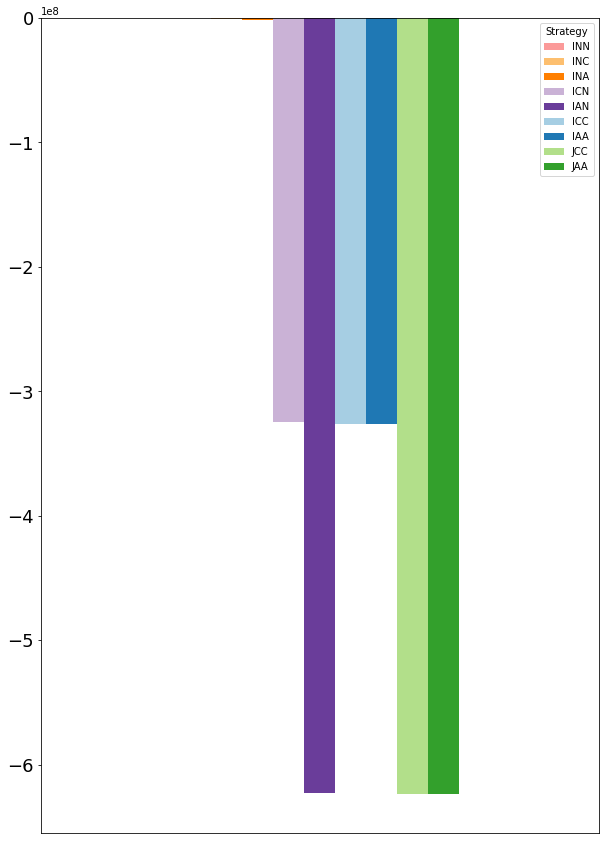

In [169]:
# plotting loss results integerated for broadband and electric
ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'INN'),
  Text(1, 0, 'INC'),
  Text(2, 0, 'INA'),
  Text(3, 0, 'ICN'),
  Text(4, 0, 'IAN'),
  Text(5, 0, 'ICC'),
  Text(6, 0, 'IAA'),
  Text(7, 0, 'JCC'),
  Text(8, 0, 'JAA')])

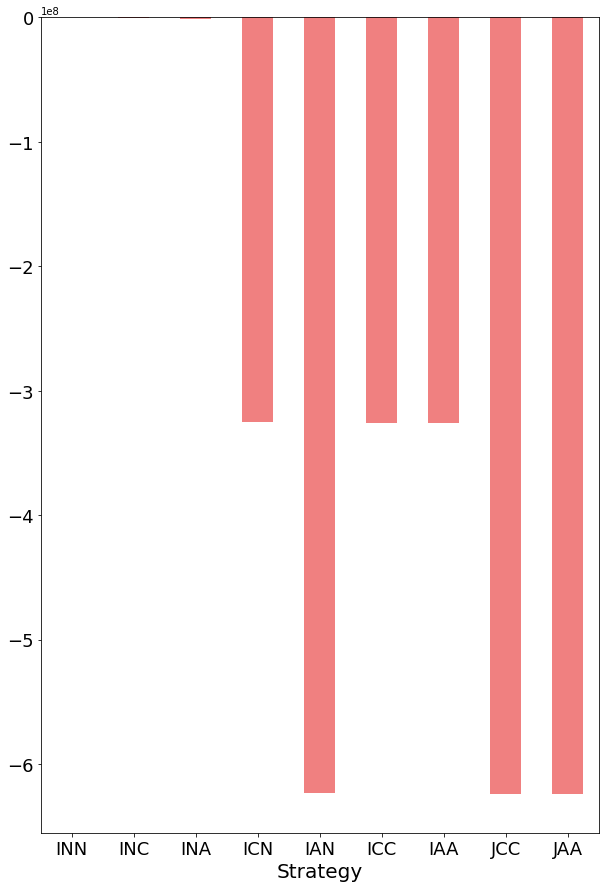

In [122]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [516]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'economic_losses'], axis=1)

In [517]:
df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

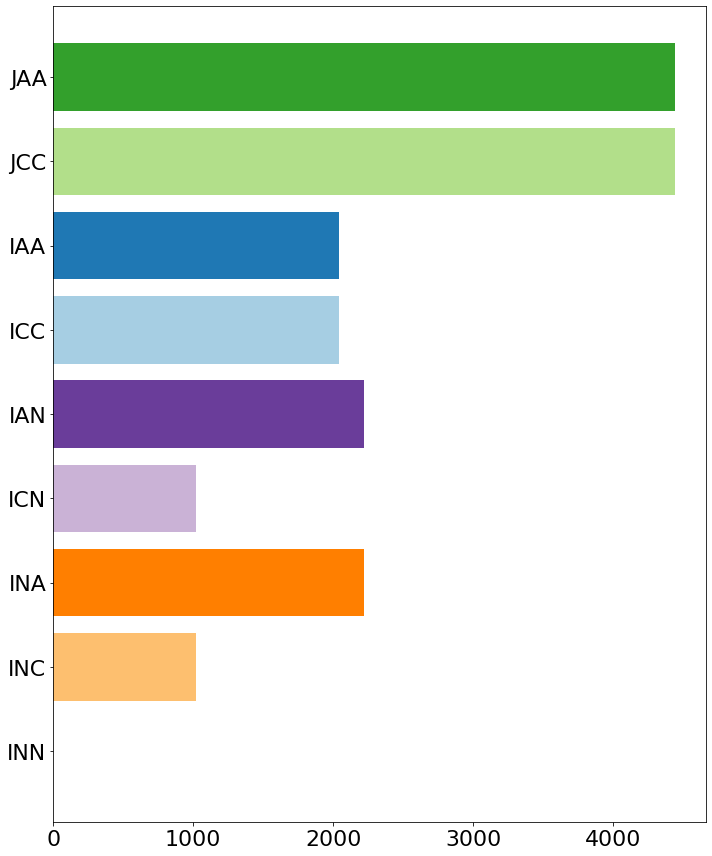

In [520]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig.set_size_inches(10,15)

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row)
#plt.xlabel ('Relative aesthetic benefit (2022 $)')
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INC','INA','ICN','IAN','ICC','IAA','JCC','JAA'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)
plt.show()

(array([], dtype=float64), [])

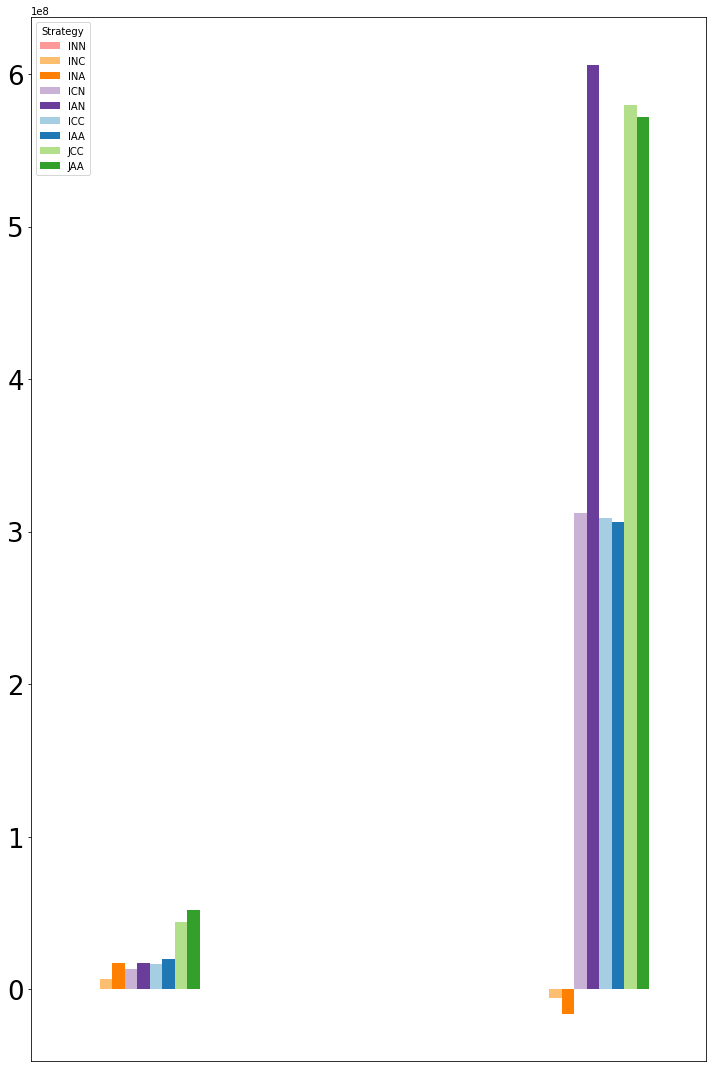

In [497]:
# plotting benefit results integerated for broadband and electric
ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#A6CEE3','#1F78B4','#B2DF8A','#33A02C'])
ax.set_xticks([])
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'INN'),
  Text(1, 0, 'INC'),
  Text(2, 0, 'INA'),
  Text(3, 0, 'ICN'),
  Text(4, 0, 'IAN'),
  Text(5, 0, 'ICC'),
  Text(6, 0, 'IAA'),
  Text(7, 0, 'JCC'),
  Text(8, 0, 'JAA')])

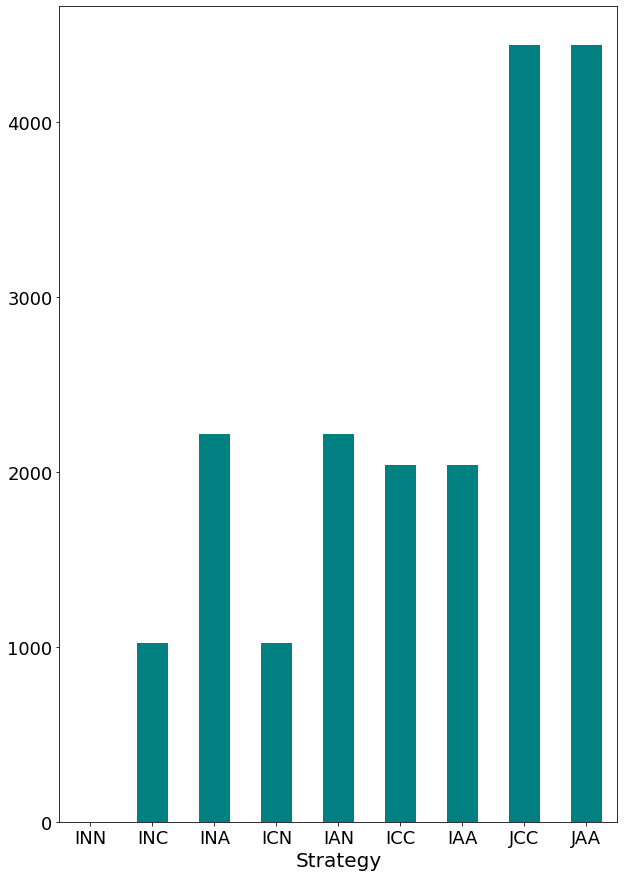

In [125]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)